In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tensorflow.keras.layers import Input,Lambda,Flatten,Dense
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# resize all the images
IMAGE_SIZE= [224,224]

# Train/Test Paths
train_path=r'D:\Practice\Car Brand Classification\Datasets\Train'
test_path=r'D:\Practice\Car Brand Classification\Datasets\Test'

In [3]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)

In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [5]:
# dont train existing weights
for layers in resnet.layers:
    layers.trainable = False

In [6]:
# To get number of output class
folders=glob('D:\Practice\Car Brand Classification\Datasets\Train\*')
folders

['D:\\Practice\\Car Brand Classification\\Datasets\\Train\\audi',
 'D:\\Practice\\Car Brand Classification\\Datasets\\Train\\lamborghini',
 'D:\\Practice\\Car Brand Classification\\Datasets\\Train\\mercedes']

In [7]:
# Flatten the output of resnet
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders),activation ='softmax')(x)

# Create model
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
# structure of model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
# parameters for models
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [11]:
# Use Image Data Generator to import images from dataset
train_datagen = ImageDataGenerator(rescale = 1./255 , #to convert pixel in 0 to 1
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255) # Dont use data augumentataion on test data

In [12]:
# Make sure you provide same target size as initialied for image size
training_set = train_datagen.flow_from_directory(r'D:\Practice\Car Brand Classification\Datasets\Train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory(r'D:\Practice\Car Brand Classification\Datasets\Test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical'
                                            )

Found 58 images belonging to 3 classes.


In [14]:
# Fit the model
final_model = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/50
2/2 [==============================] - 12s 7s/step - loss: 4.1929 - accuracy: 0.3438 - val_loss: 8.9747 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 8s 6s/step - loss: 11.3607 - accuracy: 0.3281 - val_loss: 5.2473 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 8s 6s/step - loss: 5.6039 - accuracy: 0.3906 - val_loss: 9.8109 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 8s 6s/step - loss: 7.2985 - accuracy: 0.3438 - val_loss: 9.1749 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 8s 6s/step - loss: 4.4563 - accuracy: 0.3906 - val_loss: 2.7490 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 7s 5s/step - loss: 3.2837 - accuracy: 0.3750 - val_loss: 3.1888 - val_accuracy: 0.5690
Epoch 7/50
2/2 [==============================] - 8s 5s/step - loss: 4.5263 - accuracy: 0.4375 - val_loss: 2.4019 - val_accuracy: 0.5172
Epoch 8/50
2/2 [=======================

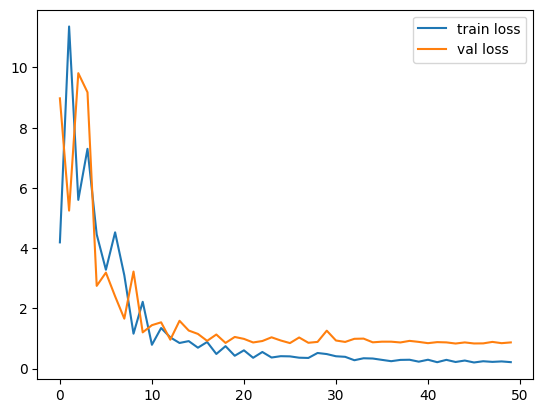

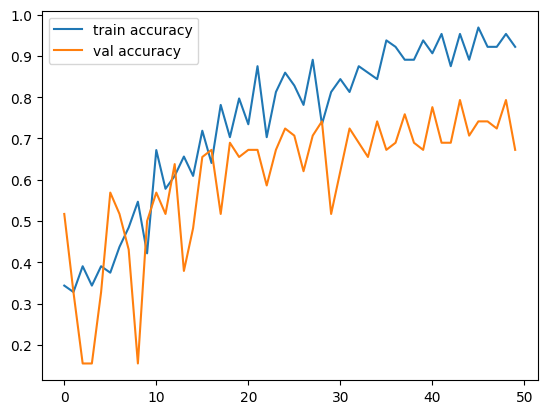

<Figure size 640x480 with 0 Axes>

In [15]:
# Plot the loss
plt.plot(final_model.history['loss'],label = 'train loss')
plt.plot(final_model.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(final_model.history['accuracy'],label = 'train accuracy')
plt.plot(final_model.history['val_accuracy'],label= 'val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_Acc')

In [16]:
# Save the model as h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [17]:
y_pred = model.predict(test_set)

2/2 [==============================] - 4s 2s/step


In [18]:
y_pred 

array([[6.44167885e-02, 1.03409335e-01, 8.32173884e-01],
       [6.09130226e-02, 2.09122404e-01, 7.29964614e-01],
       [1.13792576e-01, 4.60979482e-03, 8.81597638e-01],
       [5.30238986e-01, 6.95282146e-02, 4.00232762e-01],
       [3.80295515e-01, 3.79699737e-01, 2.40004748e-01],
       [7.71774258e-03, 3.56083393e-01, 6.36198819e-01],
       [9.81768847e-01, 1.00188414e-02, 8.21233168e-03],
       [4.93054062e-01, 4.72411931e-01, 3.45340073e-02],
       [3.90292220e-02, 1.38897732e-01, 8.22073102e-01],
       [8.15545559e-01, 8.82068928e-03, 1.75633699e-01],
       [3.58999670e-02, 6.66171432e-01, 2.97928572e-01],
       [1.43419812e-02, 9.17748511e-01, 6.79094419e-02],
       [6.77269250e-02, 1.23031754e-02, 9.19969976e-01],
       [1.81349460e-05, 2.23229011e-03, 9.97749507e-01],
       [2.82515585e-02, 9.14779365e-01, 5.69691733e-02],
       [2.19862182e-02, 9.48026419e-01, 2.99873836e-02],
       [5.40008880e-02, 8.97198796e-01, 4.88003008e-02],
       [5.67515418e-02, 5.09141

In [19]:
# take the index which has highest probability
y_pred = np.argmax(y_pred,axis = 1) 
y_pred

array([2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2,
       1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1,
       2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 1], dtype=int64)

In [20]:
# Check for indivisual image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model = load_model(r'D:\Practice\Car Brand Classification\model_resnet50.h5')

In [22]:
img=image.load_img(r'D:\Practice\Car Brand Classification\Datasets\Test\lamborghini\10.jpg',target_size=(224,224))

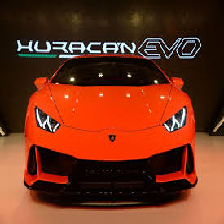

In [23]:
img

In [24]:
x = image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [25]:
x.shape

(224, 224, 3)

In [26]:
x=x/255
x

array([[[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        ...,
        [0.05098039, 0.00784314, 0.        ],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.07058824, 0.03137255, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        [0.07450981, 0.03529412, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       ...,

       [[0.81960785, 0.5058824 , 0.36078432],
        [0.8235294 , 0.50980395, 0.3647059 ],
        [0.83137256, 0

In [27]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

1/1 [==============================] - 1s 737ms/step


array([[0.0295664 , 0.03125443, 0.93917924]], dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data),axis=1)

1/1 [==============================] - 0s 97ms/step


In [30]:
a

array([2], dtype=int64)